In [7]:
import sys
sys.path.insert(0, '../python')

In [8]:
def plt_all(axes, c, label, plt_sty=dict()):
    
    plt.sca(axes[0])
    plt.loglog(c.nH, c.pok, label=label, **plt_sty)
    plt.xlabel('nH [cm^-3]')
    plt.ylabel('pressure/k_B [K cm^-3]')
    plt.legend()
    plt.ylim(1e3, 1e5)
    plt.xlim(1e-3, 1e4)

    plt.sca(axes[1])
    plt.loglog(c.T, c.Lambda*c.nH, c='k', label=r'$n_{\rm H}\Lambda$', **plt_sty)
    #plt.loglog(c.T, c.Gamma, c='grey', ls=':', label=r'$\Gamma$')
    plt.loglog(c.T, c.get_coolingLya(), label=r'Lya', **plt_sty)
    plt.loglog(c.T, c.get_coolingCII(), label=r'CII', **plt_sty)
    plt.loglog(c.T, c.get_coolingCO(), label=r'CO', **plt_sty)
    plt.loglog(c.T, c.get_coolingOI(), label=r'OI', **plt_sty)
    plt.loglog(c.T, c.get_coolingCI(), label=r'CI', **plt_sty)
    plt.xlabel('Temperature [K]')
    plt.ylabel(r'${\rm erg}\,{\rm s}^{-1}\,{\rm H}^{-1}$')
    plt.legend(loc=1)
    #ylim = plt.gca().get_ylim()
    plt.ylim(1e-28, 1e-24)

    plt.sca(axes[2])
    plt.loglog(c.T, c.cooling, c='k', label=r'cooling ($\Lambda$)', **plt_sty)
    #plt.loglog(c.T, c.heating, c='grey', ls='--', label=r'heating ($\Gamma/n_{\rm H}$)')
    plt.loglog(c.T, c.get_coolingLya()/c.nH, label=r'Lya', **plt_sty)
    plt.loglog(c.T, c.get_coolingCII()/c.nH, label=r'CII', **plt_sty)
    plt.loglog(c.T, c.get_coolingCO()/c.nH, label=r'CO', **plt_sty)
    plt.loglog(c.T, c.get_coolingOI()/c.nH, label=r'OI', **plt_sty)
    plt.loglog(c.T, c.get_coolingCI()/c.nH, label=r'CI', **plt_sty)
    plt.xlabel('Temperature [K]')
    plt.ylabel(r'${\rm erg}\,{\rm cm}^{3}\,{\rm s}^{-1}$')
    plt.legend()
    plt.ylim(bottom=1e-31, top=1e-22)

    plt.sca(axes[3])
    plt.loglog(c.T, c.x_Cplus, label='C+', **plt_sty)
    plt.loglog(c.T, c.x_CO, label='CO', **plt_sty)
    plt.loglog(c.T, c.x_OI, label='OI', **plt_sty)
    plt.loglog(c.T, c.x_CI, label='CI', **plt_sty)
    plt.loglog(c.T, 2.0*c.x_H2, label='2*H2', **plt_sty)
    plt.loglog(c.T, c.x_HI, label='HI', **plt_sty)
    plt.loglog(c.T, c.x_e, label='elec', **plt_sty)
    plt.legend(loc=4)
    plt.xlim(1e1, 5e4)
    plt.ylim(1e-8,1.0)
    plt.xlabel('Temperature [K]')
    plt.ylabel(r'abundance')
    
    plt.tight_layout()


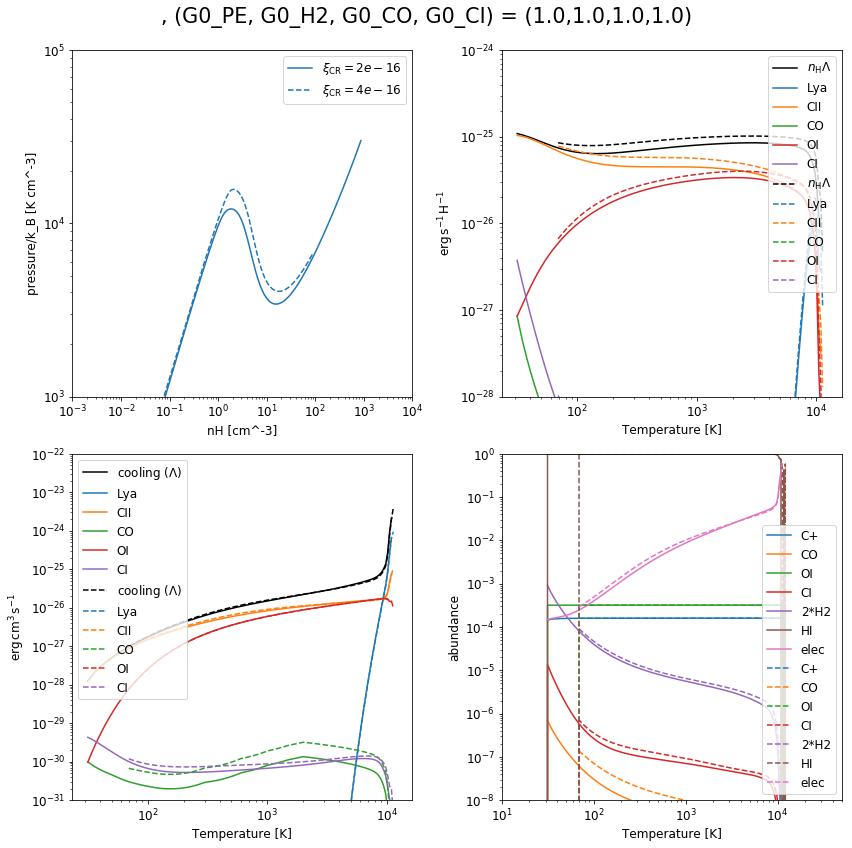

In [11]:
import cool_tigress as ct

Tmin = 10.0
Tmax = 10.0**4.1
T = np.logspace(np.log10(Tmin), np.log10(Tmax), num=200)

par = dict(T=T, Z=1.0, xi_CR=2e-16, 
           G_PE=1.0, G_CI=1.0, G_CO=1.0, G_H2=1.0,
           x_e_init=0.2, equil=True, maxiter=1, fast_flag=False)
c1 = ct.CoolTigress(**par)
par.update(xi_CR=4e-16)
c2 = ct.CoolTigress(**par)

mpl.rcParams['font.size'] = 12
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
plt_all(axes, c1, r'$\xi_{\rm CR}=2e-16$', plt_sty=dict(ls='-'))

for ax in axes:
    plt.sca(ax)
    plt.gca().set_prop_cycle(None)

plt_all(axes, c2, r'$\xi_{\rm CR}=4e-16$',
        plt_sty=dict(ls='--'))
plt.suptitle(#r'$\xi_{\rm H}$=' + str(xi_CR) + 
             r', (G0_PE, G0_H2, G0_CO, G0_CI) = (' + 
             ','.join([str(par['G_PE']),str(par['G_H2']),str(par['G_CO']),str(par['G_CI'])]) + ')',
             fontsize='xx-large')
plt.subplots_adjust(top=0.93)

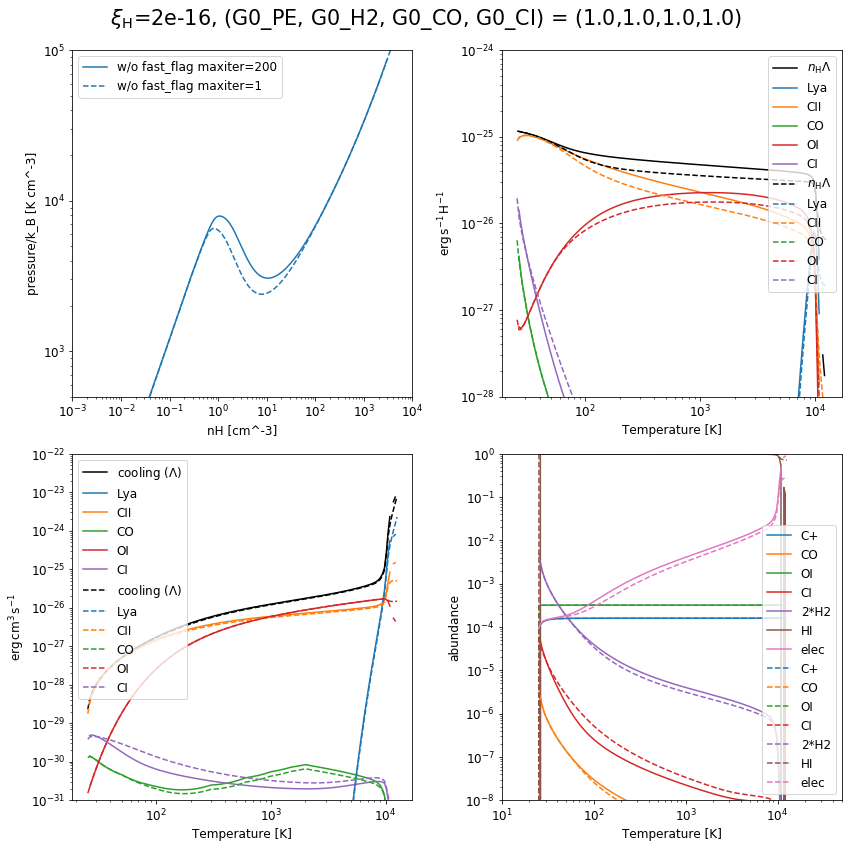

In [4]:
import cool_tigress as ct

Tmin = 10.0
Tmax = 10.0**4.1
Z = 1.0
xi_CR = 2e-16
G_PE = 1.0
G_CI = 1.0
G_CO = 1.0
G_H2 = 1.0
x_e_init = 0.2
maxiter = 1
T = np.logspace(np.log10(Tmin), np.log10(Tmax), num=200)
c1 = ct.CoolTigress(T=T, Z=Z, xi_CR=xi_CR,
                    G_PE=G_PE, G_CI=G_CI, G_CO=G_CO, G_H2=G_H2,
                    x_e_init=x_e_init, maxiter=200,
                    equil=True, fast_flag=False)
c2 = ct.CoolTigress(T=T, Z=Z, xi_CR=xi_CR,
                    G_PE=G_PE, G_CI=G_CI, G_CO=G_CO, G_H2=G_H2,
                    x_e_init=x_e_init, maxiter=1,
                    equil=True, fast_flag=True)

mpl.rcParams['font.size'] = 12
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
plt_all(axes, c1, 'w/o fast_flag maxiter=200', plt_sty=dict(ls='-'))
for ax in axes:
    plt.sca(ax)
    plt.gca().set_prop_cycle(None)

plt_all(axes, c2, 'w/o fast_flag maxiter={0:d}'.format(maxiter),
        plt_sty=dict(ls='--'))
plt.suptitle(r'$\xi_{\rm H}$=' + str(xi_CR) + 
             r', (G0_PE, G0_H2, G0_CO, G0_CI) = (' + 
             ','.join([str(G_PE),str(G_H2),str(G_CO),str(G_CI)]) + ')',
             fontsize='xx-large')
plt.subplots_adjust(top=0.93)

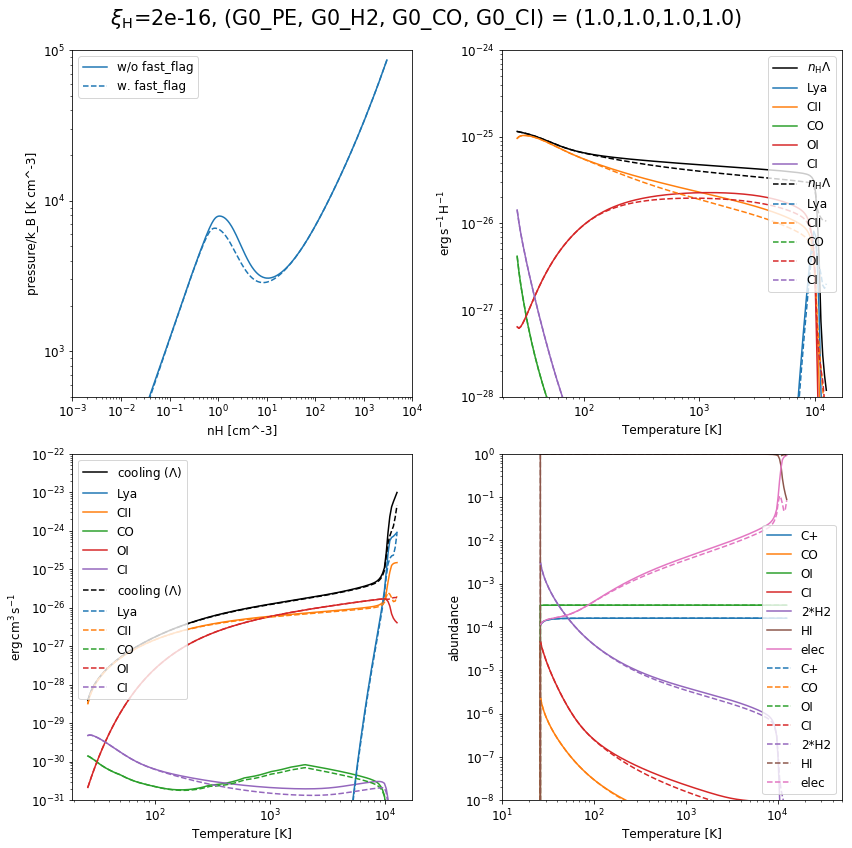

In [4]:
import cool_tigress as ct

Tmin = 10.0
Tmax = 10.0**4.1
Z = 1.0
xi_CR = 2e-16
G_PE=1.0
G_CI=1.0
G_CO=1.0
G_H2=1.0

T = np.logspace(np.log10(Tmin), np.log10(Tmax), num=200)
c1 = ct.CoolTigress(T=T, Z=Z, xi_CR=xi_CR,
                    G_PE=G_PE, G_CI=G_CI, G_CO=G_CO, G_H2=G_H2, equil=True, fast_flag=False)
c2 = ct.CoolTigress(T=T, Z=Z, xi_CR=xi_CR,
                    G_PE=G_PE, G_CI=G_CI, G_CO=G_CO, G_H2=G_H2, equil=True, fast_flag=True)

mpl.rcParams['font.size'] = 12
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

def plt_all(axes, c, label, plt_sty=dict() ):
    
    plt.sca(axes[0])
    plt.loglog(c.nH, c.pok, label=label, **plt_sty)
    plt.xlabel('nH [cm^-3]')
    plt.ylabel('pressure/k_B [K cm^-3]')
    plt.legend()
    plt.ylim(5e2, 1e5)
    plt.xlim(1e-3, 1e4)

    plt.sca(axes[1])
    plt.loglog(c.T, c.Lambda*c.nH, c='k', label=r'$n_{\rm H}\Lambda$', **plt_sty)
    #plt.loglog(c.T, c.Gamma, c='grey', ls=':', label=r'$\Gamma$')
    plt.loglog(c.T, c.get_coolingLya(), label=r'Lya', **plt_sty)
    plt.loglog(c.T, c.get_coolingCII(), label=r'CII', **plt_sty)
    plt.loglog(c.T, c.get_coolingCO(), label=r'CO', **plt_sty)
    plt.loglog(c.T, c.get_coolingOI(), label=r'OI', **plt_sty)
    plt.loglog(c.T, c.get_coolingCI(), label=r'CI', **plt_sty)
    plt.xlabel('Temperature [K]')
    plt.ylabel(r'${\rm erg}\,{\rm s}^{-1}\,{\rm H}^{-1}$')
    plt.legend(loc=1)
    #ylim = plt.gca().get_ylim()
    plt.ylim(1e-28, 1e-24)

    plt.sca(axes[2])
    plt.loglog(c.T, c.cooling, c='k', label=r'cooling ($\Lambda$)', **plt_sty)
    #plt.loglog(c.T, c.heating, c='grey', ls='--', label=r'heating ($\Gamma/n_{\rm H}$)')
    plt.loglog(c.T, c.get_coolingLya()/c.nH, label=r'Lya', **plt_sty)
    plt.loglog(c.T, c.get_coolingCII()/c.nH, label=r'CII', **plt_sty)
    plt.loglog(c.T, c.get_coolingCO()/c.nH, label=r'CO', **plt_sty)
    plt.loglog(c.T, c.get_coolingOI()/c.nH, label=r'OI', **plt_sty)
    plt.loglog(c.T, c.get_coolingCI()/c.nH, label=r'CI', **plt_sty)
    plt.xlabel('Temperature [K]')
    plt.ylabel(r'${\rm erg}\,{\rm cm}^{3}\,{\rm s}^{-1}$')
    plt.legend()
    plt.ylim(bottom=1e-31, top=1e-22)

    plt.sca(axes[3])
    plt.loglog(c.T, c.x_Cplus, label='C+', **plt_sty)
    plt.loglog(c.T, c.x_CO, label='CO', **plt_sty)
    plt.loglog(c.T, c.x_OI, label='OI', **plt_sty)
    plt.loglog(c.T, c.x_CI, label='CI', **plt_sty)
    plt.loglog(c.T, 2.0*c.x_H2, label='2*H2', **plt_sty)
    plt.loglog(c.T, c.x_HI, label='HI', **plt_sty)
    plt.loglog(c.T, c.x_e, label='elec', **plt_sty)
    plt.legend(loc=4)
    plt.xlim(1e1, 5e4)
    plt.ylim(1e-8,1.0)
    plt.xlabel('Temperature [K]')
    plt.ylabel(r'abundance')
    
    plt.tight_layout()
    
plt_all(axes, c1, 'w/o fast_flag', plt_sty=dict(ls='-'))
for ax in axes:
    plt.sca(ax)
    plt.gca().set_prop_cycle(None)
    
plt_all(axes, c2, 'w. fast_flag', plt_sty=dict(ls='--'))
plt.suptitle(r'$\xi_{\rm H}$=' + str(xi_CR) + 
             r', (G0_PE, G0_H2, G0_CO, G0_CI) = (' + 
             ','.join([str(G_PE),str(G_H2),str(G_CO),str(G_CI)]) + ')',
             fontsize='xx-large')
plt.subplots_adjust(top=0.93)

# How heating/cooling varies with nH at a fixed temperature

* For fiducial parameters, equilibrium nH does not exist at low T < ~30K and at high T > ~12000K

* Also true for other values of $G_0$

Text(0.5, 0.98, 'G_PE=G_CI=G_CO=0, G_H2=0, xi_CR=2e-14')

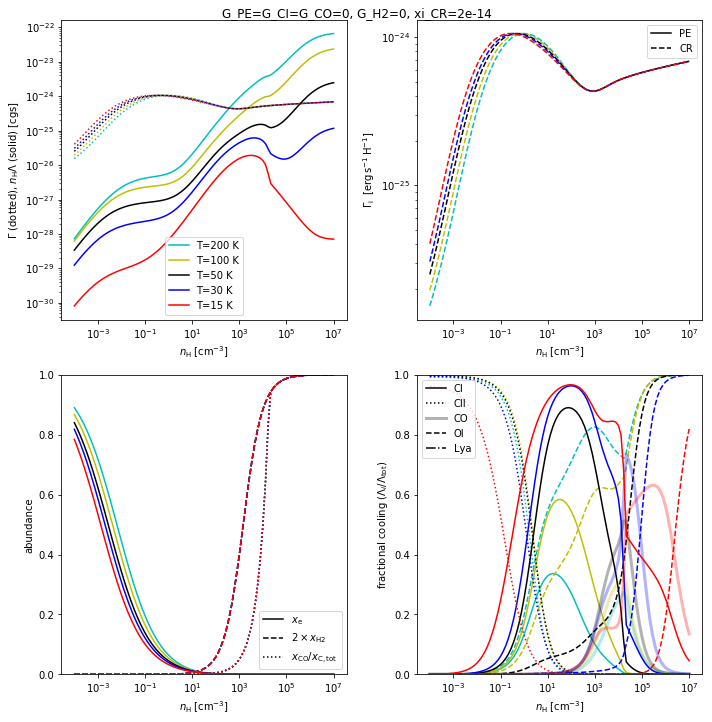

In [13]:
import cool_tigress as ct

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
nH = np.logspace(-4.0, 7.0, num=100)
G0 = 0.0
G_H2 = 0.0
xCstd = 1.6e-4
xOstd = 3.2e-4
def plt_heating_cooling(T=100.0, xi_CR=2e-16, color='k'):
    c = ct.CoolTigress(nH=nH, xi_CR=xi_CR, T=T,
                       G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=False)
    plt.sca(axes[0])
    plt.loglog(c.nH, c.cooling*c.nH, c=color, ls='-', label='T={0:g} K'.format(T))
    plt.loglog(c.nH, c.heating*c.nH, c=color, ls=':')
    plt.sca(axes[1])
#     plt.loglog(c.nH, c.get_heatingPE()/(c.heating*c.nH), c=color, ls='-')
#     plt.loglog(c.nH, c.get_heatingCR()/(c.heating*c.nH), c=color, ls='--')
    plt.loglog(c.nH, c.get_heatingPE(), c=color, ls='-')
    plt.loglog(c.nH, c.get_heatingCR(), c=color, ls='--')
    plt.sca(axes[2])
    plt.loglog(c.nH, c.x_e, c=color, ls='-')
    plt.loglog(c.nH, 2*c.x_H2, c=color, ls='--')
    plt.loglog(c.nH, c.x_CO/xCstd, c=color, ls=':')
    plt.sca(axes[3])
    plt.loglog(c.nH, c.get_coolingCI()/(c.cooling*c.nH), c=color, ls='-')
    plt.loglog(c.nH, c.get_coolingCII()/(c.cooling*c.nH), c=color, ls=':')
    plt.loglog(c.nH, c.get_coolingCO()/(c.cooling*c.nH), c=color,
               ls='-', alpha=0.3, lw=3)
    plt.loglog(c.nH, c.get_coolingOI()/(c.cooling*c.nH), c=color, ls='--')
    plt.loglog(c.nH, c.get_coolingLya()/(c.cooling*c.nH), c=color, ls='-.')
    return c

xi_CR = 2e-14
plt_heating_cooling(T=200.0, xi_CR=xi_CR, color='c')
plt_heating_cooling(T=100.0, xi_CR=xi_CR, color='y')
plt_heating_cooling(T=50.0, xi_CR=xi_CR, color='k')
plt_heating_cooling(T=30.0, xi_CR=xi_CR, color='b')
c = plt_heating_cooling(T=15.0, xi_CR=xi_CR, color='r')

plt.sca(axes[0])
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'$\Gamma$ (dotted), $n_{\rm H}\Lambda$ (solid) [cgs]')
plt.legend()
plt.sca(axes[1])
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'$\Gamma_{\rm i}\;\;[{\rm erg}\,{\rm s}^{-1}\,{\rm H}^{-1}]$')
plt.legend([mpl.lines.Line2D([0], [0], ls='-', c='k'),
            mpl.lines.Line2D([0], [0], ls='--', c='k')],
           ['PE','CR'])
plt.sca(axes[2])
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'abundance')
plt.legend([mpl.lines.Line2D([0], [0], ls='-', c='k'),
            mpl.lines.Line2D([0], [0], ls='--', c='k'),
            mpl.lines.Line2D([0], [0], ls=':', c='k')],
           [r'$x_{\rm e}$',
            r'$2\times x_{\rm H2}$',
            r'$x_{\rm CO}/x_{\rm C,tot}$'])
#plt.ylim(1e-4, 1.0)
plt.ylim(0.0, 1e0)
plt.yscale('linear')

plt.sca(axes[3])
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'fractional cooling ($\Lambda_i/\Lambda_{\rm tot}$)')
plt.legend([mpl.lines.Line2D([0], [0], ls='-', c='k'),
            mpl.lines.Line2D([0], [0], ls=':', c='k'),
            mpl.lines.Line2D([0], [0], ls='-', c='k', lw=3, alpha=0.3),
            mpl.lines.Line2D([0], [0], ls='--', c='k'),
            mpl.lines.Line2D([0], [0], ls='-.', c='k')],
           ['CI', 'CII', 'CO', 'OI', 'Lya'], loc=2)
plt.ylim(0.0, 1e0)
plt.yscale('linear')
plt.tight_layout()
plt.suptitle('G_PE=G_CI=G_CO={0:g}, G_H2={1:g}, xi_CR={2:g}'.format(G0, G_H2, xi_CR),
             va='bottom', ha='center')

# Thermal equilibrium curve

Text(0.5, 1.0, '$\\xi_{\\rm H}=\\sqrt{\\chi}2\\times 10^{-16}\\,{\\rm s}^{-1}$')

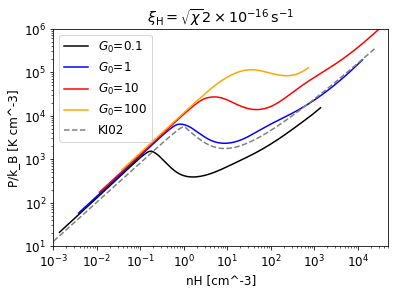

In [12]:
import cool_tigress as ct

T = np.logspace(np.log10(10.0), np.log10(10.0**4.05), num=200)
G_H2 = 0.0
G0 = 0.1
xi_CR = 2.0e-16*np.sqrt(G0)
c = ct.CoolTigress(T=T, xi_CR=xi_CR, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.loglog(c.nH, c.pok, c='k', ls='-',
           label=r'$G_0$={0:g}'.format(G0))

G0 = 1.0
xi_CR = 2.0e-16*np.sqrt(G0)
c = ct.CoolTigress(T=T, xi_CR=xi_CR, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.loglog(c.nH, c.pok, c='b', ls='-',
           label=r'$G_0$={0:g}'.format(G0))

G0 = 10.0
xi_CR = 2.0e-16*np.sqrt(G0)
c = ct.CoolTigress(T=T, xi_CR=xi_CR, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.loglog(c.nH, c.pok, c='r', ls='-',
           label=r'$G_0$={0:g}'.format(G0))

G0 = 100.0
xi_CR = 2.0e-16*np.sqrt(G0)
c = ct.CoolTigress(T=T, xi_CR=xi_CR, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.loglog(c.nH, c.pok, c='orange', ls='-',
           label=r'$G_0$={0:g}'.format(G0))

# Overplot KI02 equilibrium curve
import KI02
cf = KI02.coolftn()
mu=cf.temp/cf.T1
# # G0prime == 1.0 when Sigma_FUV = 6.9 Lsun / pc**2
G0prime = 1.0
heat1 = cf.heat[0]*((mu - mu.min())/(mu.max() - mu.min()))*(G0prime + 0.0024)
nden1 = heat1/cf.cool
# P/kB = 1.1*n*T?
plt.loglog(nden1, cf.temp*nden1*1.1, c='grey', ls='--', label='KI02')

plt.xlim(1e-3, 5e4)
plt.ylim(1e1, 1e6)
plt.xlabel('nH [cm^-3]')
plt.ylabel('P/k_B [K cm^-3]')
plt.legend(loc=2)
plt.title(r'$\xi_{\rm H}=\sqrt{\chi}2\times 10^{-16}\,{\rm s}^{-1}$')
#plt.savefig('a.png')

Text(0.5, 1.0, '$\\xi_{\\rm H}=\\sqrt{\\chi}2\\times 10^{-16}\\,{\\rm s}^{-1}$')

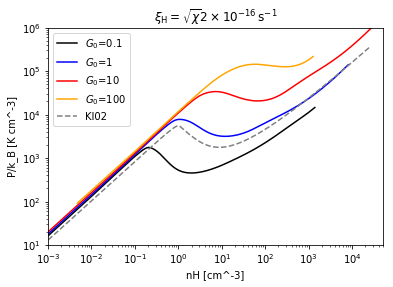

In [14]:
import cool_tigress as ct

T = np.logspace(np.log10(10.0), np.log10(10.0**4.05), num=200)
G_H2 = 0.0
G0 = 0.1
xi_CR = 2.0e-16*np.sqrt(G0)
c = ct.CoolTigress(T=T, xi_CR=xi_CR, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.loglog(c.nH, c.pok, c='k', ls='-',
           label=r'$G_0$={0:g}'.format(G0))

G0 = 1.0
xi_CR = 2.0e-16*np.sqrt(G0)
c = ct.CoolTigress(T=T, xi_CR=xi_CR, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.loglog(c.nH, c.pok, c='b', ls='-',
           label=r'$G_0$={0:g}'.format(G0))

G0 = 10.0
xi_CR = 2.0e-16*np.sqrt(G0)
c = ct.CoolTigress(T=T, xi_CR=xi_CR, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.loglog(c.nH, c.pok, c='r', ls='-',
           label=r'$G_0$={0:g}'.format(G0))

G0 = 100.0
xi_CR = 2.0e-16*np.sqrt(G0)
c = ct.CoolTigress(T=T, xi_CR=xi_CR, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.loglog(c.nH, c.pok, c='orange', ls='-',
           label=r'$G_0$={0:g}'.format(G0))

# Overplot KI02 equilibrium curve
import KI02
cf = KI02.coolftn()
mu=cf.temp/cf.T1
# # G0prime == 1.0 when Sigma_FUV = 6.9 Lsun / pc**2
G0prime = 1.0
heat1 = cf.heat[0]*((mu - mu.min())/(mu.max() - mu.min()))*(G0prime + 0.0024)
nden1 = heat1/cf.cool
# P/kB = 1.1*n*T?
plt.loglog(nden1, cf.temp*nden1*1.1, c='grey', ls='--', label='KI02')

plt.xlim(1e-3, 5e4)
plt.ylim(1e1, 1e6)
plt.xlabel('nH [cm^-3]')
plt.ylabel('P/k_B [K cm^-3]')
plt.legend(loc=2)
plt.title(r'$\xi_{\rm H}=\sqrt{\chi}2\times 10^{-16}\,{\rm s}^{-1}$')
#plt.savefig('a.png')

# Density vs. $T_{\rm gas}$ relation for shielded gas for different $\xi_{\rm CR}$

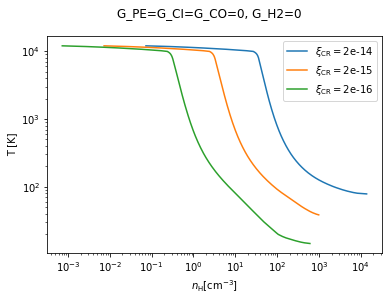

In [15]:
import cool_tigress as ct
T = np.logspace(np.log10(10), np.log10(1.2e4), num=300)
G0 = 0.0
G_H2 = 0.0

c = ct.CoolTigress(T=T, xi_CR=2e-14, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.plot(c.nH, c.T, label=r'$\xi_{\rm CR}=$' + '{0:g}'.format(2e-14))
c = ct.CoolTigress(T=T, xi_CR=2e-15, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.plot(c.nH, c.T, label=r'$\xi_{\rm CR}=$' + '{0:g}'.format(2e-15))
c = ct.CoolTigress(T=T, xi_CR=2e-16, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
plt.plot(c.nH, c.T, label=r'$\xi_{\rm CR}=$' + '{0:g}'.format(2e-16))
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e1, 5e2)
plt.xlabel(r'$n_{\rm H} [{\rm cm}^{-3}]$')
plt.ylabel('T [K]')
plt.suptitle('G_PE=G_CI=G_CO={0:g}, G_H2={1:g}'.format(G0, G_H2), ha='center')
plt.legend()

In [16]:
G0 = 0.0
G_H2 = 0.0
T = np.logspace(np.log10(10), np.log10(1.2e4), num=300)
xi_CR = [2e-16, 2e-15, 2e-14]
c1 = ct.CoolTigress(T=T, xi_CR=xi_CR[0], G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
c2 = ct.CoolTigress(T=T, xi_CR=xi_CR[1], G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
c3 = ct.CoolTigress(T=T, xi_CR=xi_CR[2], G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)

# Equilibrium cooling rate per particle as a function of $n_{\rm H}$, etc

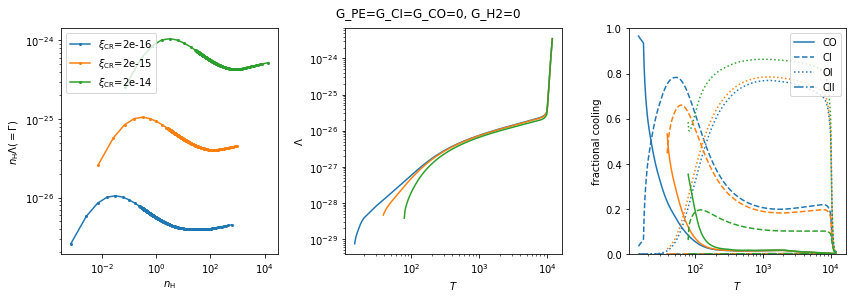

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, c in enumerate((c1, c2, c3)):
    plt.sca(axes[0])
    l1, = plt.loglog(c.nH, c.Lambda*c.nH, 'o-', ms=2.0,
                     label=r'$\xi_{{\rm CR}}$={0:g}'.format(xi_CR[i]))
    
    plt.sca(axes[1])
    l2, = plt.loglog(c.T, c.Lambda, '-', ms=2.0)

    if i == 0:
        label=['CO', 'CI', 'OI', 'CII']
    else:
        label=[None, None, None, None]
    plt.sca(axes[2])
    plt.plot(c.T, c.get_coolingCO()/(c.Lambda*c.nH),
             '-', ms=2.0, c=l1.get_color(), label=label[0])
    plt.plot(c.T, c.get_coolingCI()/(c.Lambda*c.nH),
             '--', ms=2.0, c=l1.get_color(), label=label[1])
    plt.plot(c.T, c.get_coolingOI()/(c.Lambda*c.nH),
             ':', ms=2.0, c=l1.get_color(), label=label[2])
    plt.plot(c.T, c.get_coolingCII()/(c.Lambda*c.nH),
             '-.', ms=2.0, c=l1.get_color(), label=label[3])

plt.sca(axes[0])
plt.xlabel(r'$n_{\rm H}$')
plt.ylabel(r'$n_{\rm H}\Lambda(=\Gamma)$')
plt.legend(loc=2)
plt.sca(axes[1])
plt.xlabel(r'$T$')
plt.ylabel(r'$\Lambda$')
plt.sca(axes[2])
plt.xlabel(r'$T$')
plt.ylabel(r'fractional cooling')
plt.xscale('log')
plt.ylim(0, 1)
plt.legend(loc=1)
plt.suptitle('G_PE=G_CI=G_CO={0:g}, G_H2={1:g}'.format(G0, G_H2), va='bottom', ha='center')
plt.tight_layout()

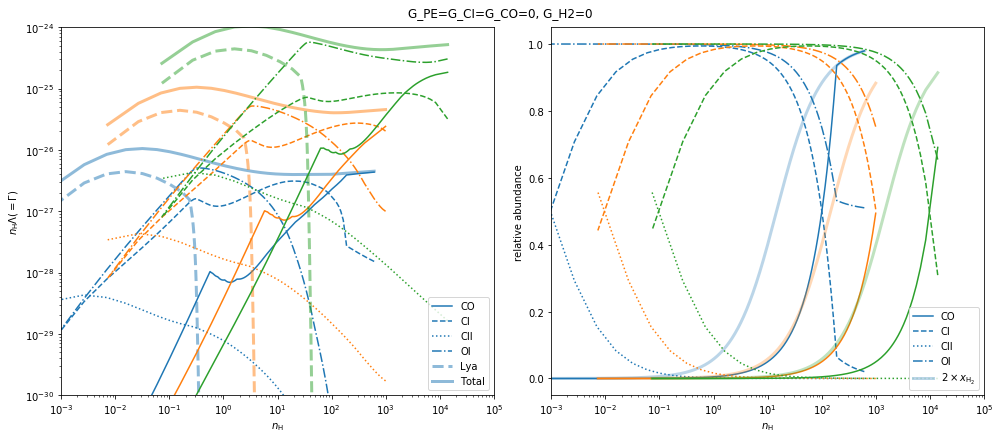

In [18]:
G0 = 0.0
G_H2 = 0.0
T = np.logspace(np.log10(10), np.log10(1.2e4), num=100)
# c1 = ct.CoolTigress(T=T, xi_CR=2e-16, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
# c2 = ct.CoolTigress(T=T, xi_CR=2e-15, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
# c3 = ct.CoolTigress(T=T, xi_CR=2e-14, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=True)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
xCstd = 1.6e-4
xOstd = 3.2e-4
for i, c in enumerate((c1, c2, c3)):
    if i == 0:
        label=['CO', 'CI', 'CII', 'OI', 'Lya', 'Total']
    else:
        label=[None, None, None, None, None, None]
    plt.sca(axes[0])
    m = ~(np.ma.masked_invalid(c.nH).mask)
    l1, = plt.plot(c.nH[m], c.get_coolingCO()[m], '-', ms=2.0, label=label[0])
    plt.plot(c.nH[m], c.get_coolingCI()[m],
             '--', ms=2.0, c=l1.get_color(), label=label[1])
    plt.plot(c.nH[m], c.get_coolingCII()[m],
             ':', ms=2.0, c=l1.get_color(), label=label[2])
    plt.plot(c.nH[m], c.get_coolingOI()[m],
             '-.', ms=2.0, c=l1.get_color(), label=label[3])
    plt.plot(c.nH[m], c.get_coolingLya()[m], 
             '--', c=l1.get_color(), lw=3.0, label=label[4], alpha=0.5)
    plt.plot(c.nH[m], c.cooling[m]*c.nH[m], 
             '-', c=l1.get_color(), lw=3.0, label=label[5], alpha=0.5)

    if i == 0:
        label=['CO', 'CI', 'CII', 'OI', r'$2\times x_{\rm H_2}$']
    else:
        label=[None, None, None, None, None]
    plt.sca(axes[1])
    plt.plot(c.nH, c.x_CO/xCstd, '-', ms=2.0, c=l1.get_color(), label=label[0])
    plt.plot(c.nH, c.x_CI/xCstd, '--', ms=2.0, c=l1.get_color(), label=label[1])
    plt.plot(c.nH, c.x_Cplus/xCstd, ':', ms=2.0, c=l1.get_color(), label=label[2])
    plt.plot(c.nH, c.x_OI/xOstd, '-.', ms=2.0, c=l1.get_color(), label=label[3])
    plt.plot(c.nH, 2.0*c.x_H2, '-', lw=3.0, c=l1.get_color(), label=label[4], alpha=0.3)


plt.sca(axes[0])
plt.xlabel(r'$n_{\rm H}$')
plt.ylabel(r'$n_{\rm H}\Lambda(=\Gamma)$')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=4)
plt.xlim(1e-3, 1e5)
plt.ylim(bottom=1e-30, top=1e-24)

plt.sca(axes[1])
plt.xlabel(r'$n_{\rm H}$')
plt.ylabel(r'relative abundance')
plt.xscale('log')
plt.legend(loc=4)
plt.xlim(1e-3, 1e5)
plt.suptitle('G_PE=G_CI=G_CO={0:g}, G_H2={1:g}'.format(G0, G_H2), va='bottom', ha='center')
plt.tight_layout()

(1e-30, 1e-23)

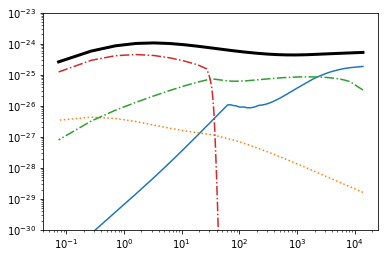

In [19]:
plt.plot(c.nH[m], c.Lambda[m]*c.nH[m], '-', c='k', lw=3.0, ms=2.0, label=label[0])
plt.plot(c.nH[m], c.get_coolingCO()[m], '-', ms=2.0, label=label[0])
plt.plot(c.nH[m], c.get_coolingCII()[m], ':', ms=2.0, label=label[0])
plt.plot(c.nH[m], c.get_coolingCI()[m], '-.', ms=2.0, label=label[0])
plt.plot(c.nH[m], c.get_coolingLya()[m], '-.', ms=2.0, label=label[0])
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-30, 1e-23)

# Hot gas cooling rate

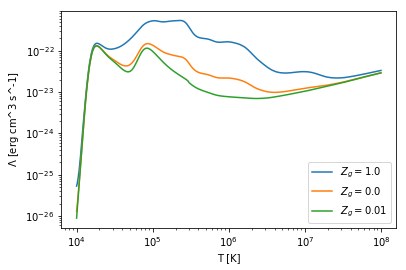

In [20]:
import cool_tigress as ct

T = np.logspace(4, 8, num=1000)
plt.loglog(T, ct.coolingHot(T, Z_g=1.0), label=r'$Z_g=1.0$')
plt.loglog(T, ct.coolingHot(T, Z_g=0.1), label=r'$Z_g=0.0$')
plt.loglog(T, ct.coolingHot(T, Z_g=0.01), label=r'$Z_g=0.01$')
plt.xlabel('T [K]')
plt.ylabel(r'$\Lambda$ [erg cm^3 s^-1]')
plt.legend()

# CO shielding factor

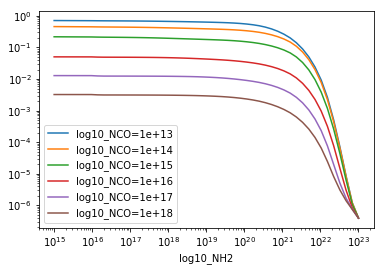

In [21]:
import cool_tigress as ct

NCO = 10.0**np.arange(13.0, 19.0)
NH2 = np.logspace(15.0, 23.0)

for NCO_ in NCO:
    plt.plot(NH2, ct.fShield_CO_V09_(NCO_, NH2), label=r'log10_NCO={0:g}'.format(NCO_))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10_NH2')
plt.legend()
#class PDR1d(object):
    

# Bug in C shielding factor

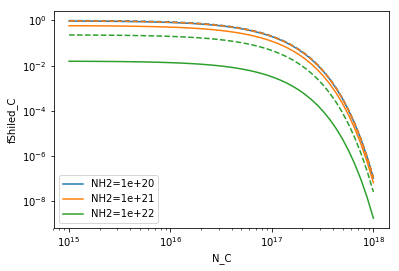

In [22]:
def fShield_C(NC, NH2, opt=0):
    tau_H2 = 1.2e-14*2.0*NH2
    y = 1.17e-8*tau_H2
    if opt == 0:
        ry = np.exp(-y)/(1.0 + y)
    elif opt == 1:
        ry = np.exp(-y)*(1.0 + y)
    rc = np.exp(-1.6e-17*NC)
    return rc*ry

NH2 = 10.0**np.array([20, 21, 22])
#NC = np.logspace(13.0, 19.0)
NC = np.logspace(15.0, 18.0)

for NH2_ in NH2:
    l, = plt.plot(NC, fShield_C(NC, NH2_),
             label=r'NH2={0:g}'.format(NH2_))
    plt.plot(NC, fShield_C(NC, NH2_, opt=1), '--', c=l.get_color())

plt.xscale('log')
plt.yscale('log')
plt.xlabel('N_C')
plt.ylabel('fShiled_C')
plt.legend()


The dashed line is from the existing code, and the solid lines are correct values.

# CO cooling rate

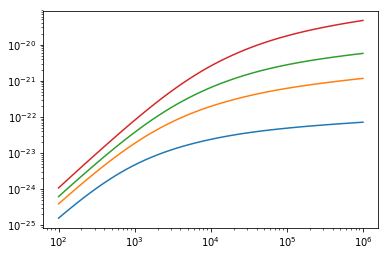

In [23]:
import cool_tigress as ct
xCstd = 1.6e-4
x_e = 1e-5
x_CO = 1.6e-4
x_HI = 1e-6
x_H2 = 0.5
nH = np.logspace(np.log10(1e2), np.log10(1e6))
T = 15.0
dvdr = 9.0e-14
plt.loglog(nH, ct.coolingCO(x_e, x_CO, x_HI, x_H2, nH, 15.0, dvdr)*nH)
plt.loglog(nH, ct.coolingCO(x_e, x_CO, x_HI, x_H2, nH, 30.0, dvdr)*nH)
plt.loglog(nH, ct.coolingCO(x_e, x_CO, x_HI, x_H2, nH, 50.0, dvdr)*nH)
plt.loglog(nH, ct.coolingCO(x_e, x_CO, x_HI, x_H2, nH, 100.0, dvdr)*nH)